# Pymaceuticals Inc.
---

### Analysis

-We can see that Capomulin and  Ramicane worked better compare to Infubinol and Ceftamin.
-Infubinol has one oultlier where the drug regimen worked better.
-The distribution of Female and male is almost equal.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
study_data_complete = pd.merge(study_results,mouse_metadata , on='Mouse ID', how='left')

# Display the data table for preview
#study_data_complete.head(5)
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
study_data_complete['Mouse ID'].count()

1893

In [22]:
# number of unique mice IDs in the data
len(study_data_complete['Mouse ID'].unique())
print(len(study_data_complete['Mouse ID'].unique()))
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicate_df =  study_data_complete [study_data_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_boolean = study_data_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

duplicate_df =study_data_complete[duplicate_boolean]

print(duplicate_df['Mouse ID'].unique())


249
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data_complete = study_data_complete[~duplicate_boolean]
clean_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [24]:
# Checking the number of mice in the clean DataFrame.
clean_study_data_complete['Mouse ID'].nunique()
print(clean_study_data_complete['Mouse ID'].nunique())
clean_study_data_complete

249


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#df.groupby(['Animal']).mean()
tumor_vol_groupby_drug_regimen = clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
#print(groupby_drug_regimen)
mean_tumor_volume = tumor_vol_groupby_drug_regimen.mean()
median_tumor_volume = tumor_vol_groupby_drug_regimen.median()
var_tumor_volume = tumor_vol_groupby_drug_regimen.var()
std_tumor_volume = tumor_vol_groupby_drug_regimen.std()
sem_tumor_volume = tumor_vol_groupby_drug_regimen.sem()

#display(pd.concat([series1, series2], axis = 1))
 #keys = ['key1', 'key2']
pd.concat([mean_tumor_volume,median_tumor_volume,var_tumor_volume,std_tumor_volume,sem_tumor_volume], axis = 1,
         keys=['Mean','Median','Variance','Standard Deviation','SEM'])






,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'All mice tested for each Drug Regimen')

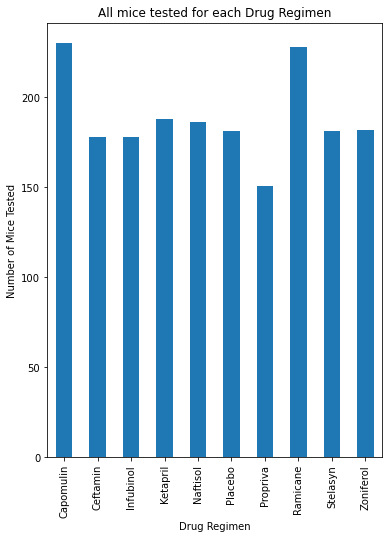

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#clean_study_data_complete.groupby(['Drug Regimen']).count()['Timepoint'].plot.bar()

# Create a group based on the values in the 'Drug Regimen' column

groupby_drug_regimen =  clean_study_data_complete.groupby(['Drug Regimen'])

#total number of timepoints for all mice tested

count_timepoints = groupby_drug_regimen.count()['Timepoint']

count_timepoints

# Create a bar chart based off of the group series from count_timepoints

count_chart = count_timepoints.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice Tested")
count_chart.set_title("All mice tested for each Drug Regimen")






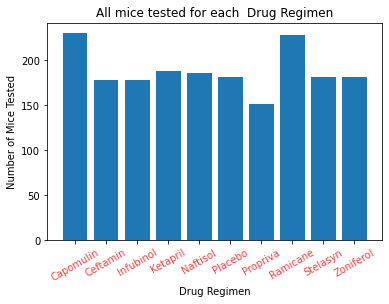

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#clean_study_data_complete

count_df = clean_study_data_complete.groupby(['Drug Regimen']).count()
#print(count_df )

 #establish x axis
x_axis = np.arange(0, len(count_df.index))


# #create plot
plt.bar(x_axis ,count_df['Timepoint'])

# # assign x_ticks
plt.xticks(x_axis ,count_df.index, color='r', alpha=0.75 , rotation =30)



# # title and labels
plt.title("All mice tested for each  Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()





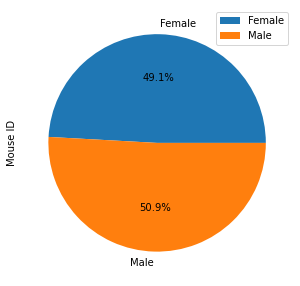

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

count_sex_df = clean_study_data_complete.groupby(['Sex']).count()
plot =count_sex_df.plot.pie(y='Mouse ID', figsize=(5, 5),autopct="%0.1f%%")





C:\Users\Sridevi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app


([<matplotlib.patches.Wedge at 0x1a731609d48>,
 [Text(0.03027754049614056, 1.099583225836728, 'Female'),
  Text(-0.030277540496141186, -1.099583225836728, 'Male')],
 [Text(0.01651502208880394, 0.5997726686382152, '49.1%'),
  Text(-0.01651502208880428, -0.5997726686382152, '50.9%')])

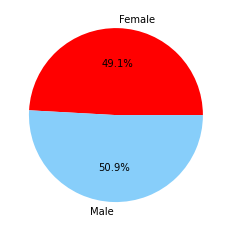

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count_sex_df = clean_study_data_complete.groupby(['Sex']).count()
#print(count_sex_df)

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
distribution = [count_sex_df['Mouse ID']]

# The colors of each section of the pie chart
colors = ["red",  "lightskyblue"]

plt.pie(distribution, labels=labels, colors=colors, autopct="%0.1f%%")
        



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

drug_regimen_isin_filter = clean_study_data_complete['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
                    
max_timepoint_df = clean_study_data_complete[drug_regimen_isin_filter].groupby(['Drug Regimen','Mouse ID']).max()['Timepoint'].reset_index()

#newdf = df1.merge(df2, how='right')
max_timepoint_tumor_df =  clean_study_data_complete.merge(max_timepoint_df, on =['Drug Regimen','Mouse ID','Timepoint'])
drug_regimem_quantiles_df=max_timepoint_tumor_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').quantile([.25,.5,.75])


#.loc[('Capomulin',0.25)]


for Drug_Regimen in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    upperq = drug_regimem_quantiles_df.loc[(Drug_Regimen,0.75)][0]
    lowerq = drug_regimem_quantiles_df.loc[(Drug_Regimen,0.25)][0]
    iqr = upperq-lowerq
      
    
    print(f"The lower quartile of tumor is: {lowerq}")
    print(f"The upper quartile of tumor is: {upperq}")
    print(f"The interquartile range of tumor is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    drug_regimen_filtered_df = max_timepoint_tumor_df[max_timepoint_tumor_df['Drug Regimen']==Drug_Regimen][['Tumor Volume (mm3)']]
    outliers = drug_regimen_filtered_df[(drug_regimen_filtered_df['Tumor Volume (mm3)'] < lower_bound) |
                                             (drug_regimen_filtered_df['Tumor Volume (mm3)'] > upper_bound)]
    print(f"outliers for {Drug_Regimen} is {outliers}")
    
    #print(f"outliers for {Drug_Regimen}")
    print('*****************************')




The lower quartile of tumor is: 32.37735684
The upper quartile of tumor is: 40.1592203
The interquartile range of tumor is: 7.781863460000004
outliers for Capomulin is Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
*****************************
The lower quartile of tumor is: 31.56046955
The upper quartile of tumor is: 40.65900627
The interquartile range of tumor is: 9.098536719999998
outliers for Ramicane is Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
*****************************
The lower quartile of tumor is: 54.04860769
The upper quartile of tumor is: 65.52574285
The interquartile range of tumor is: 11.477135160000003
outliers for Infubinol is    Tumor Volume (mm3)
4           36.321346
*****************************
The lower quartile of tumor is: 48.72207785
The upper quartile of tumor is: 64.29983003
The interquartile range of tumor is: 15.577752179999997
outliers for Ceftamin is Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
***********************

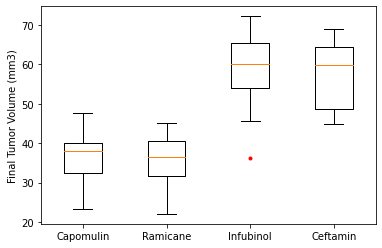

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_data = []
for Drug_Regimen in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    #print(max_timepoint_tumor_df[max_timepoint_tumor_df['Drug Regimen']==Drug_Regimen][['Tumor Volume (mm3)']].iloc[:,0])
    boxplot_data.append(max_timepoint_tumor_df[max_timepoint_tumor_df['Drug Regimen']==Drug_Regimen][['Tumor Volume (mm3)']].iloc[:,0])

plt.boxplot(boxplot_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], sym='r.')

plt.ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

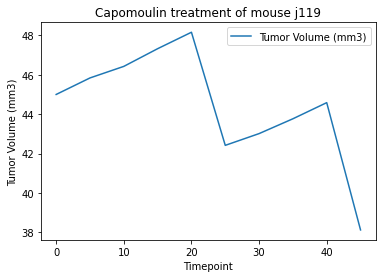

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


j119_df = clean_study_data_complete[(clean_study_data_complete['Drug Regimen'].isin(['Capomulin'])) & (clean_study_data_complete['Mouse ID']=='j119')]
#print(j119_df)
ax = j119_df.plot(kind ='line' ,x='Timepoint' , y='Tumor Volume (mm3)' , title ="Capomoulin treatment of mouse j119")

ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")




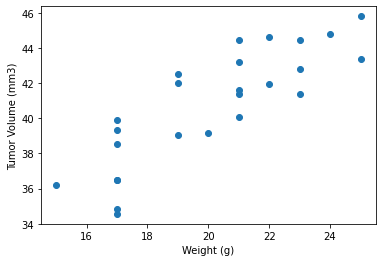

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
filter_df =clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin(['Capomulin'])]
mean_tumor_volume=filter_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
mean_weight=filter_df.groupby(['Mouse ID']).mean()['Weight (g)']
avg_tumor_weight=pd.concat([mean_tumor_volume, mean_weight], axis=1)
#print(avg_tumor_weight)
plt.scatter(avg_tumor_weight['Weight (g)'],avg_tumor_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_tumor_weight.loc[:,'Weight (g)']
average_tumor_volume =avg_tumor_weight.loc[:,'Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


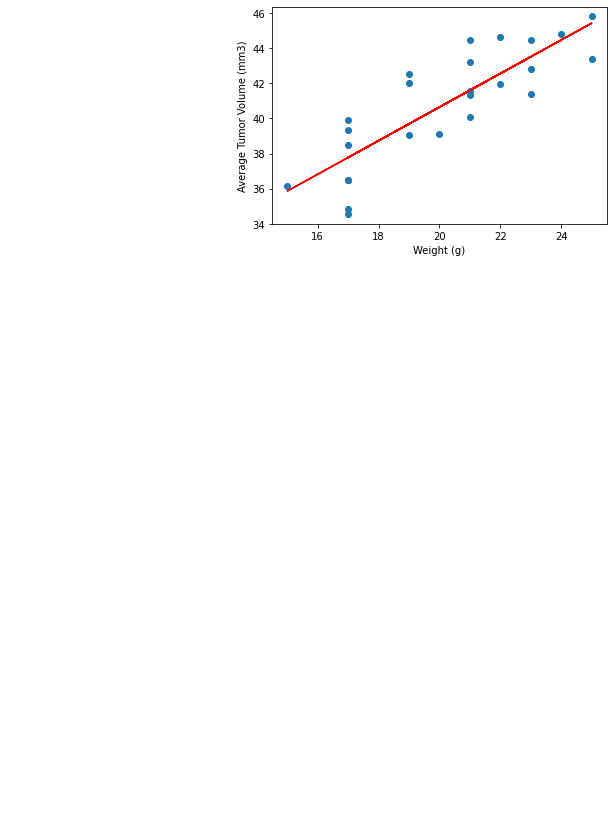

In [18]:
# Add the linear regression equation and line to plot
x_values = mouse_weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()